# Plot spectral mirror plots

load libraries

In [1]:
import sys
import csv
sys.path.append('MetabolomicsSpectrumResolver/') #https://github.com/mwang87/MetabolomicsSpectrumResolver

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from views import *
from parsing import *

RDKit WARNING: [15:41:43] Enabling RDKit 2019.09.1 jupyter extensions


specify GNPS job ID

In [4]:
GNPSTASK = 'XX'

### plot one spectral mirror plot

In [5]:
clusterindex = '5100' 

In [6]:
libraryid = 'CCMSLIB00002316426'

In [7]:
usi1 = 'mzspec:GNPSTASK-' + GNPSTASK + ':spectra/specs_ms.mgf:scan:' + clusterindex

In [8]:
usi2 = 'mzspec:GNPSLIBRARY:' + libraryid

In [9]:
kwargs = {'width': 10,
                         'height': 6,
                         'mz_min': 20,
                         'mz_max': 1000,
                         'CompoundName':True,
                         'max_intensity_unlabeled': 1.05,
                         'max_intensity_labeled': 1.25,
                         'max_intensity_mirror_labeled': 1.50,
                         'max_intensity': 1.50,
                         'grid': False,
                         # List of peaks to annotate in the top/bottom
                         # spectrum.
                         'annotate_peaks': [True,True],
                         'annotate_threshold': 0.1,
                         'annotate_precision': 4,
                         'annotation_rotation': 90}

In [10]:
from views import _generate_mirror_figure

In [11]:
_generate_mirror_figure(usi1, usi2, 'pdf', **kwargs)

#212121
#388E3C
phenylacetylglutamine


'tmp/fb16fd48-e97f-45e3-8f09-b8738c84b3c3.pdf'

### plot several spectral mirror plots

In [16]:
import pandas as pd
from joblib import Parallel, delayed
from views import _generate_mirror_figure,_prepare_spectrum

load differential abundance data

In [17]:
diff = pd.read_csv('../Heatmap/SignificantFeatures_withlibraryIDs.txt', sep = '\t')

In [18]:
diff.head()

,node,sig,p_neigh,sig_neigh,lasso,hits
0,2270,True,0.000015,True,False,(CCMSLIB00005464388:SPERMINE)
1,2315,True,0.075196,False,False,(CCMSLIB00005464134:L-CARNITINE)
2,2637,True,0.814354,False,False,(CCMSLIB00003138708:Spectral Match to Phe-Phe ...
3,2680,False,0.027552,True,False,(CCMSLIB00005464316:O-ACETYLCARNITINE)
4,2695,True,0.113808,False,False,(CCMSLIB00004720318:Gyromitrin)


In [19]:
diff.shape

(100, 6)

load library IDs

In [20]:
libs = pd.read_csv('GNPSLibraryHits.tsv', sep = '\t')

In [22]:
merged_df = pd.merge(libs, diff, left_on='#Scan#', right_on='node', how='right')

In [23]:
merged_df.shape

(100, 42)

In [25]:
sig = merged_df[merged_df['SpectrumID'].notna()]

In [26]:
len(sig)

98

In [27]:
sig['#Scan#'] = sig['#Scan#'].apply(np.int64)

/Users/madeleineernst/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [28]:
usis1 = []
usis2 = []

clindexes = []
cosinescores = []

for index, row in sig.iterrows():
    #print(row['#Scan#'], row['SpectrumID'])
    
    clusterindex = str(row['#Scan#'])
    libraryid = row['SpectrumID']
    
    usi1 = 'mzspec:GNPSTASK-' + GNPSTASK + ':spectra/specs_ms.mgf:scan:' + clusterindex
    usi2 = 'mzspec:GNPSLIBRARY:' + libraryid

    cos = row['MQScore']
    cosinescores.append(cos)
    clindexes.append(clusterindex)
    
    usis1.append(usi1)
    usis2.append(usi2)

taurohyodeoxycholic acid
N-ACETYLPUTRESCINE
Spectral Match to
1-(9Z-Octadecenoyl)-sn-glycero-3-phosphocholine from NIST14
Spectral Match to
D-Mannitol from NIST14
taurohyodeoxycholic acid
Massbank:PR100340 1-Lauroyl-2-hydroxy-sn-glycero-3-phosphocholine
ReSpect:PT108140 1-Decanoyl-2-Hydroxy-sn-Glycero-3-Phosphocholine
Spectral Match to
1-O-Hexadecyl-2-O-(2E-butenoyl)-sn-glyceryl-3-phosphocholine from NIST14
Spectral Match to
Lyso-Sphingomyelin from NIST14
Spectral Match to
Chlorhexidine from NIST14
Spectral Match to
Xanthosine from NIST14
3-UREIDOPROPIONATE
Spectral Match to
Ampicillin from NIST14
Spectral Match to
Penicillamine disulfide from
NIST14
LAUROYLCARNITINE
Spectral Match to
PyroGlu-Phe from NIST14
taurocholic acid
Spectral Match to
5-Pregnen-3.beta.-ol-20-one from NIST14
6,10a-dihydroxy-4-(hydroxymethyl)-4,7,11b-trimethyl-1,2,3,4a,5,6,6a,7,11,11a-decahydronaphtho[2,1-f][1]benzofuran-9-one
taurohyocholic acid
taurohyocholic acid
taurohyocholic acid
taurohyocholic acid
Spectra

IndexError: list index out of range

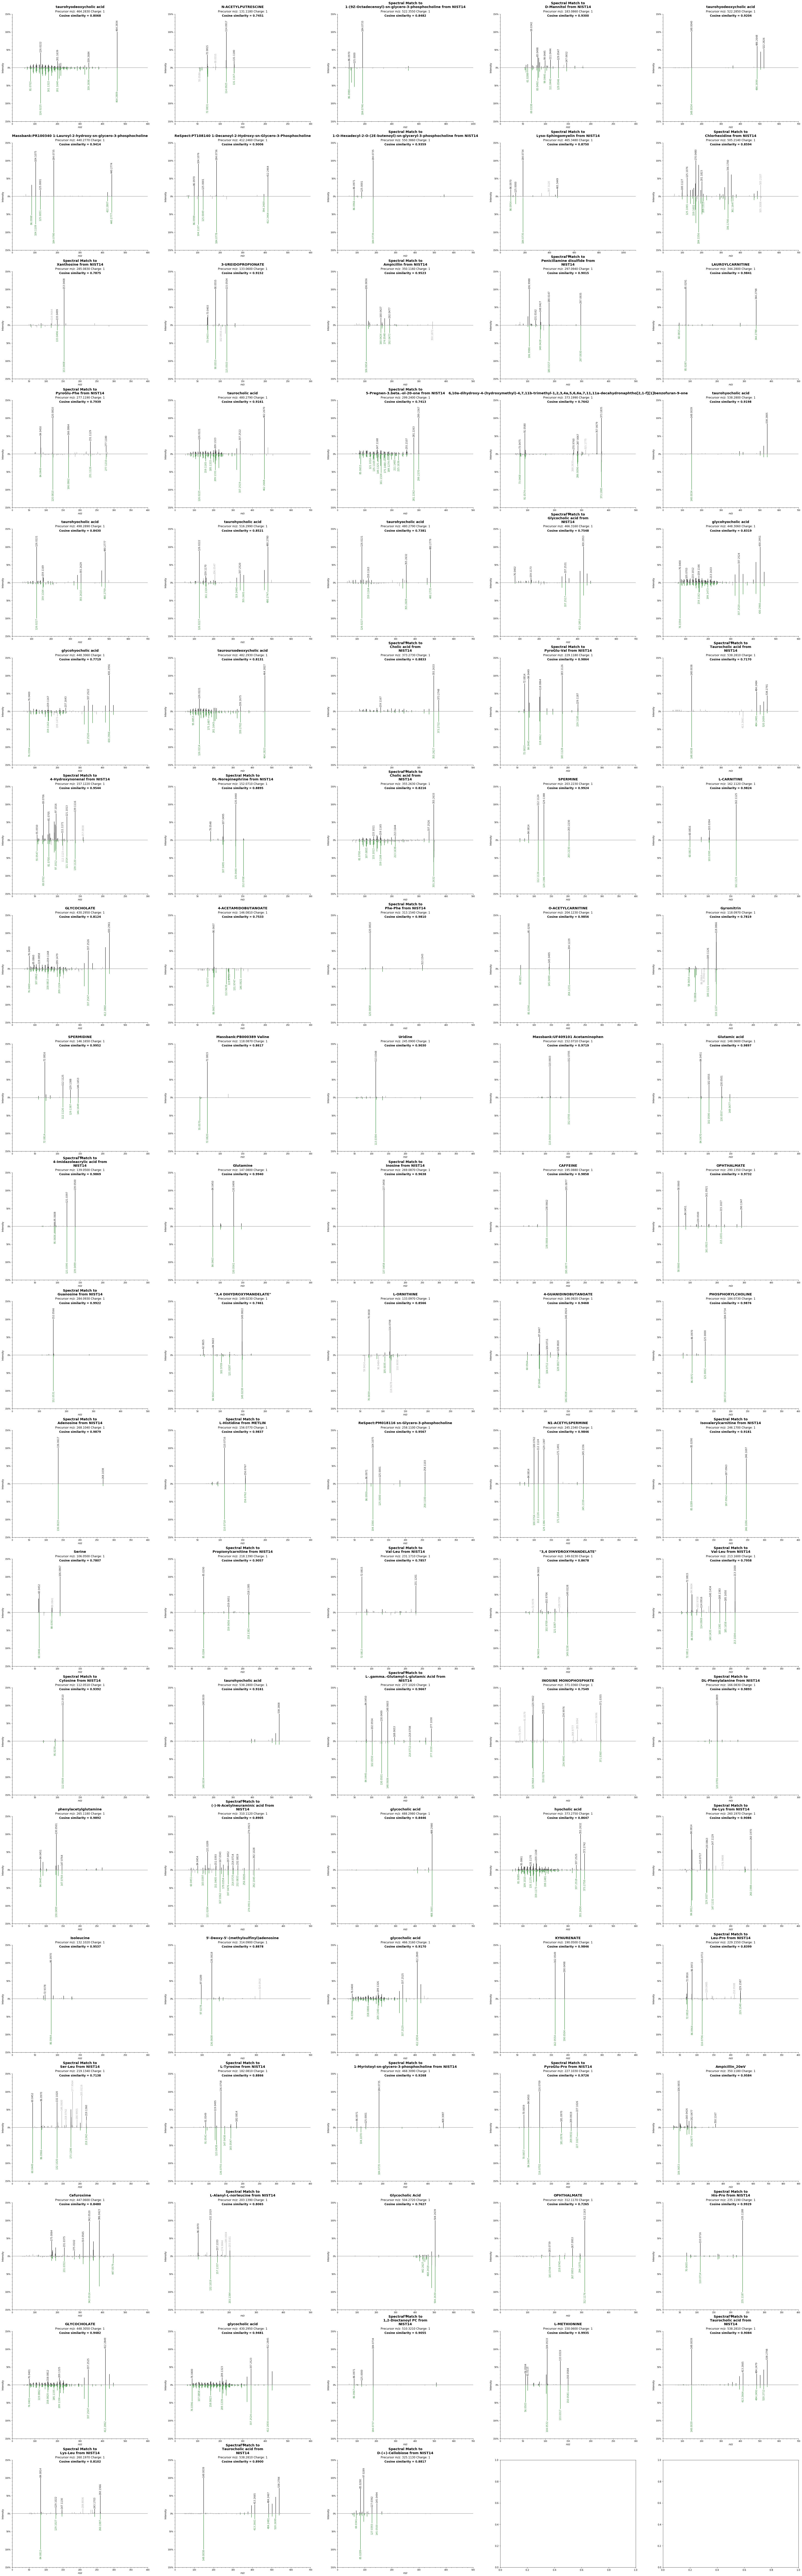

In [29]:
figbig, axes = plt.subplots(20, 5, sharex=False, sharey=False)
figbig.set_figheight(200) #12
figbig.set_figwidth(60) #60

# axes are in a two-dimensional array, indexed by [row, col]
ind = 0
for m in range(20):
    for j in range(5):  
        #print(m)
        kwargs = {'width': 10,
                         'height': 6,
                         'mz_min': 20,
                         'mz_max': 1000,
                         'CompoundName':True,
                         'max_intensity_unlabeled': 1.05,
                         'max_intensity_labeled': 1.25,
                         'max_intensity_mirror_labeled': 1.50,
                         'max_intensity': 1.50,
                         'grid': False,
                         # List of peaks to annotate in the top/bottom
                         # spectrum.
                         'annotate_peaks': [True,True],
                         'annotate_threshold': 0.1,
                         'annotate_precision': 4,
                         'annotation_rotation': 90}
        ax = axes[m, j] 
        
        spectrum_top = usis1[ind] 
        spectrum_bottom = usis2[ind]

        annotate_peaks = kwargs['annotate_peaks']
        kwargs['annotate_peaks'] = annotate_peaks[0]
        spectrum_top = _prepare_spectrum(usis1[ind], **kwargs)
        kwargs['annotate_peaks'] = annotate_peaks[1]
        spectrum_bottom = _prepare_spectrum(usis2[ind], **kwargs)

        fragment_mz_tolerance = 0.02    # TODO: Configurable?

        if spectrum_top.annotation is None:
            spectrum_top.annotation = np.full_like(
                spectrum_top.mz, None, object)
        if spectrum_bottom.annotation is None:
            spectrum_bottom.annotation = np.full_like(
                spectrum_bottom.mz, None, object)
        for i, (annotation, mz) in enumerate(zip(spectrum_top.annotation,
                                                 spectrum_top.mz)):
            if annotation is None:
                spectrum_top.annotation[i] = sus.FragmentAnnotation(0, mz, '')
            if np.min(np.abs(spectrum_bottom.mz - mz)) < fragment_mz_tolerance:
                spectrum_top.annotation[i].ion_type = 'top'
            else:
                spectrum_top.annotation[i].ion_type = 'unmatched'
        for i, (annotation, mz) in enumerate(zip(spectrum_bottom.annotation,
                                                 spectrum_bottom.mz)):
            if annotation is None:
                spectrum_bottom.annotation[i] = sus.FragmentAnnotation(0, mz, '')
            if np.min(np.abs(spectrum_top.mz - mz)) < fragment_mz_tolerance:
                spectrum_bottom.annotation[i].ion_type = 'bottom'
            else:
                spectrum_bottom.annotation[i].ion_type = 'unmatched'

        # Colors for mirror plot peaks, subject to change.
        sup.colors['top'] = '#212121'
        sup.colors['bottom'] = '#388E3C'
        sup.colors['unmatched'] = 'darkgray'

        sup.mirror(spectrum_top, spectrum_bottom,
                   {'annotate_ions': kwargs['annotate_peaks'],
                    'annot_kws': {'rotation': kwargs['annotation_rotation'],
                                  'clip_on': True},
                    'grid': kwargs['grid']}, ax=ax)

        xmin, xmax = ax.get_xlim()
        ax.set_xlim(kwargs.get('xmin', xmin), kwargs.get('xmax', xmax))
        ax.set_ylim(-kwargs['max_intensity_mirror_labeled'], kwargs['max_intensity_mirror_labeled'])

        if not kwargs['grid']:
            ax.spines['right'].set_visible(False)
            ax.spines['top'].set_visible(False)
            ax.yaxis.set_ticks_position('left')
            ax.xaxis.set_ticks_position('bottom')

        if kwargs['CompoundName'] == True:
            tokens = usis2[ind].split(':')
            identifier= tokens[2]
            request_url = "https://gnps.ucsd.edu/ProteoSAFe/SpectrumCommentServlet?SpectrumID=%s" % (identifier)
            response = requests.get(request_url)
            compoundname = response.json()["annotations"][0]["Compound_Name"]
            compoundname = pretty_name(compoundname)
            print(compoundname)

            title = ax.text(0.5, 1.05, f'{compoundname}', horizontalalignment='center',
                        verticalalignment='bottom', fontsize='x-large',
                        fontweight='bold', transform=ax.transAxes)
            subtitle = (
                f'Precursor m/z: '
                f'{spectrum_bottom.precursor_mz:.{kwargs["annotate_precision"]}f} '
                if spectrum_bottom.precursor_mz > 0 else '')
            subtitle += f'Charge: {spectrum_bottom.precursor_charge}'
            subtitle = ax.text(0.5, 1.01, subtitle, horizontalalignment='center',
                            verticalalignment='bottom', fontsize='large',
                            transform=ax.transAxes)

            similarity = cosinescores[ind]
            subtitle_score = f'Cosine similarity = {similarity:.4f}'
            ax.text(0.5, 0.97, subtitle_score, horizontalalignment='center',
                    verticalalignment='bottom', fontsize='large',
                    fontweight='bold', transform=ax.transAxes)

            ind = ind+1


figbig

In [30]:
figbig.savefig('MirrorPlots_AllSamples.pdf')